# USGS tiles download & dates

In [1]:
usgs_dir_csv_fn = "baker lidar files - Sheet2.csv"

In [2]:
import pandas as pd
import pathlib
import subprocess
import geopandas as gpd
import folium
import rioxarray

import matplotlib.pyplot as plt

import json
import shapely

In [3]:
df = pd.read_csv(usgs_dir_csv_fn)

In [4]:
df.head()

Link  UploadDate UploadTime  \
0  USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz  2018-01-02       0:55   
1  USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz  2018-01-02       0:56   
2  USGS_LPC_WA_MtBaker_2015_10UEU7298_LAS_2017.laz  2018-01-02       0:58   
3  USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz  2018-01-02       0:59   
4  USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz  2018-01-02       0:59   

   Size  
0  1.7M  
1  7.2M  
2   15M  
3   11M  
4  397K

In [6]:
fnames = list(df["Link"])

In [7]:
fnames[:5]

['USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz',
 'USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz',
 'USGS_LPC_WA_MtBaker_2015_10UEU7298_LAS_2017.laz',
 'USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz',
 'USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz']

In [8]:
import pathlib
usgs_dir = pathlib.Path("/mnt/1.0_TB_VOLUME/sethv/shashank_data/usgs_lpc_cache/")

In [54]:
def parse_size(string):
    # string = row["Size"]
    """1.7M -> 1.7, 397K divide by 1000"""
    size = float(string[:-1])
    suffix = string[-1]
    if suffix == "M":
        pass
    elif suffix == "K":
        size /= 1000
    else:
        raise NotImplementedError
        
    return size


In [53]:
df["Size"].apply(parse_size).sum()

130536.94

In [55]:
!du .

133671816	.


In [12]:
len(df)

616

In [13]:
base_dir_url = "https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/"

In [14]:
url = base_dir_url + "USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz"

In [15]:
df["url"] = base_dir_url + df["Link"]

In [16]:
df.head()

Link  UploadDate UploadTime  \
0  USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz  2018-01-02       0:55   
1  USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz  2018-01-02       0:56   
2  USGS_LPC_WA_MtBaker_2015_10UEU7298_LAS_2017.laz  2018-01-02       0:58   
3  USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz  2018-01-02       0:59   
4  USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz  2018-01-02       0:59   

   Size                                                url  
0  1.7M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
1  7.2M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
2   15M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
3   11M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
4  397K  https://rockyweb.usgs.gov/vdelivery/Datasets/S...

In [20]:
import os

In [35]:
%cd /mnt/Backups/sethv/USGS_LPC_WA_MtBaker_2015/

/mnt/Backups/sethv/USGS_LPC_WA_MtBaker_2015


In [37]:
downloaded = df["Link"].apply(os.path.exists)
# for fn in df["Link"].sample(5):
#     if not os.path.exists(fn):
#     subprocess.run(["wget", "-nc", "--quiet", url])
#     print(f"Downloaded {url}")



In [40]:
urls = list(df[~downloaded]["url"])
len(urls)

470

In [41]:
def download_url(url):
    print(f"-Downloading {url})
    subprocess.run(["wget", "-nc", "--quiet", url])
    print(f"+Downloaded {url}")

In [42]:
import concurrent.futures

with concurrent.futures.ProcessPoolExecutor(max_workers=10) as executor:
    executor.map(download_url, urls)

Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7394_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBa

## verify file sizes

In [58]:
df.head()

Link  UploadDate UploadTime  \
0  USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz  2018-01-02       0:55   
1  USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz  2018-01-02       0:56   
2  USGS_LPC_WA_MtBaker_2015_10UEU7298_LAS_2017.laz  2018-01-02       0:58   
3  USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz  2018-01-02       0:59   
4  USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz  2018-01-02       0:59   

   Size                                                url  
0  1.7M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
1  7.2M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
2   15M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
3   11M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...  
4  397K  https://rockyweb.usgs.gov/vdelivery/Datasets/S...

In [69]:
df["Size"].apply(parse_size).sum()
def check_size(row):
    fn = row["Link"]
    size_bytes = os.path.getsize(fn)
    size_megabytes = size_bytes / 2**20 #10**6
    usgs_listed_size = parse_size(row["Size"])
    # print(f"{fn} has size={size_bytes} MB, usgs_server said {usgs_listed_size} M but that might be 2**10 issue")
    return size_megabytes - usgs_listed_size
df.apply(check_size, axis=1).max() # max discrepancy of 41.8 MB disappears to 0.5 Mebibytes if we assume USGS dir was using Mebibytes 2**20 bytes

0.4993762969970703

## calculate total number of points in the folder with pdal metadata

In [70]:
laz_input_fn = df["Link"].iloc[0]

In [90]:
def get_point_count(laz_fn):
    result = subprocess.run(
        ["pdal", "info", "--metadata", laz_fn],
        stderr=subprocess.PIPE,  # stderr and stdout get
        stdout=subprocess.PIPE,
    )  # captured as bytestrings

    # decode stdout from bytestring and convert to a dictionary
    json_result = json.loads(result.stdout.decode())
    # import pprint
    # pprint.pprint(json_result["metadata"], indent=2)
    
    return json_result["metadata"]["count"]

In [91]:
get_point_count(laz_input_fn)

299678

In [93]:
df.head()["Link"].apply(get_point_count).sum()

6552062

In [94]:
df["point_count"] = df["Link"].apply(get_point_count)

In [95]:
df.head()

Link  UploadDate UploadTime  \
0  USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz  2018-01-02       0:55   
1  USGS_LPC_WA_MtBaker_2015_10UEU7297_LAS_2017.laz  2018-01-02       0:56   
2  USGS_LPC_WA_MtBaker_2015_10UEU7298_LAS_2017.laz  2018-01-02       0:58   
3  USGS_LPC_WA_MtBaker_2015_10UEU7299_LAS_2017.laz  2018-01-02       0:59   
4  USGS_LPC_WA_MtBaker_2015_10UEU7393_LAS_2017.laz  2018-01-02       0:59   

   Size                                                url  point_count  
0  1.7M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...       299678  
1  7.2M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...      1242021  
2   15M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...      2611444  
3   11M  https://rockyweb.usgs.gov/vdelivery/Datasets/S...      2326090  
4  397K  https://rockyweb.usgs.gov/vdelivery/Datasets/S...        72829

In [116]:
%%capture pdalinfo
!pdal info --metadata USGS_LPC_WA_MtBaker_2015_10UEU7296_LAS_2017.laz

In [123]:
pdalinfo = json.loads(pdalinfo.stdout)

In [124]:
pdalinfo.keys()

dict_keys(['file_size', 'filename', 'metadata', 'now', 'pdal_version', 'reader'])

In [126]:
pdalinfo["metadata"].keys()

dict_keys(['comp_spatialreference', 'compressed', 'copc', 'count', 'creation_doy', 'creation_year', 'dataformat_id', 'dataoffset', 'filesource_id', 'global_encoding', 'global_encoding_base64', 'header_size', 'major_version', 'maxx', 'maxy', 'maxz', 'minor_version', 'minx', 'miny', 'minz', 'offset_x', 'offset_y', 'offset_z', 'point_length', 'project_id', 'scale_x', 'scale_y', 'scale_z', 'software_id', 'spatialreference', 'srs', 'system_id', 'vlr_0', 'vlr_1'])

In [127]:
pdalinfo["metadata"]["comp_spatialreference"]

'COMPD_CS["NAD83(HARN) / UTM zone 10N + NAVD88 height - Geoid03",PROJCS["NAD83(HARN) / UTM zone 10N",GEOGCS["NAD83(HARN)",DATUM["NAD83_High_Accuracy_Reference_Network",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6152"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4152"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3740"]],VERT_CS["NAVD88 height - Geoid03",VERT_DATUM["North American Vertical Datum 1988",2005,EXTENSION["PROJ4_GRIDS","g2012a_conus.gtx,g2012a_alaska.gtx,g2012a_guam.gtx,g2012a_hawaii.gtx,g2012a_puertorico.gtx,g2012a_samoa.gtx"],AUTHORITY["EPSG","5103"]],UNIT["metre",1,AUTHORITY

In [128]:
import pyproj

In [130]:
in_ccrs = pyproj.CRS.from_string(pdalinfo["metadata"]["comp_spatialreference"])
in_ccrs

<Compound CRS: COMPD_CS["NAD83(HARN) / UTM zone 10N + NAVD88 heig ...>
Name: NAD83(HARN) / UTM zone 10N + NAVD88 height - Geoid03
Axis Info [None|vertical]:
- [east]: Easting (metre)
- [north]: Northing (metre)
- [up]: Up (metre)
Area of Use:
- undefined
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83(HARN) / UTM zone 10N
- NAVD88 height

In [160]:
in_ccrs.sub_crs_list[0]

<Derived Projected CRS: EPSG:3740>
Name: NAD83(HARN) / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [143]:
in_ccrs.to_epsg() # doesn't work, no EPSG matching due to the NAVD88 height + GEOID03 vertical datum

In [133]:
in_ccrs.to_epsg()

In [135]:
in_ccrs.is_compound

True

In [96]:
df["point_count"].sum()

23821316975

In [18]:
%cd point_countgs_dir
for url in df["url"].sample(5):
    subprocess.run(["wget", "-nc", "--quiet", url])
    print(f"Downloaded {url}")

/mnt/1.0_TB_VOLUME/sethv/shashank_data/usgs_lpc_cache
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEV8514_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEV7712_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU8488_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEV9605_LAS_2017.laz
Downloaded https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU7399_LAS_2017.laz


## Checking the metadata

In [113]:
link_without_ext = "https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/metadata/WA_MtBaker_2015/WA_MtBaker_2015/shapefiles/Mt_Baker_LiDAR_Tile_Index."
for ext in ["shp", "shx", "dbf", "sbn", "sbx", "prj", "dbf"]:
    link = f"{link_without_ext}{ext}"
    !wget "$link"


--2022-08-02 09:31:47--  https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/metadata/WA_MtBaker_2015/WA_MtBaker_2015/shapefiles/Mt_Baker_LiDAR_Tile_Index.shp
Resolving prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)... 52.218.176.3
Connecting to prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)|52.218.176.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91012 (89K) [binary/octet-stream]
Saving to: ‘Mt_Baker_LiDAR_Tile_Index.shp.1’

Mt_Baker_LiDAR_Tile 100%[===================>]  88.88K  --.-KB/s    in 0.02s   

2022-08-02 09:31:47 (5.04 MB/s) - ‘Mt_Baker_LiDAR_Tile_Index.shp.1’ saved [91012/91012]

--2022-08-02 09:31:47--  https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/metadata/WA_MtBaker_2015/WA_MtBaker_2015/shapefiles/Mt_Baker_LiDAR_Tile_Index.shx
Resolving prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)... 52.218.176.3
Connecting to prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)|52.218.176.3|:443... connected.
HTTP request 

In [7]:
gdf = gpd.read_file("lpc_index.gpkg")

In [8]:
gdf["srs"].iloc[0]

'PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6339"]]'

In [9]:
gdf.head()

location  \
0  /staging/Washington/182977/WA_EasternCascades_...   
1  /staging/Washington/182977/WA_EasternCascades_...   
2  /staging/Washington/182977/WA_EasternCascades_...   
3  /staging/Washington/182977/WA_EasternCascades_...   
4  /staging/Washington/182977/WA_EasternCascades_...   

                                                 srs  \
0  PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NA...   
1  PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NA...   
2  PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NA...   
3  PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NA...   
4  PROJCS["NAD83(2011) / UTM zone 10N",GEOGCS["NA...   

                   modified                   created  \
0 2021-09-27 02:25:42+00:00 2021-10-29 18:52:07+00:00   
1 2021-09-27 02:25:46+00:00 2021-10-29 18:52:19+00:00   
2 2021-09-27 02:25:51+00:00 2021-10-29 18:52:31+00:00   
3 2021-09-27 02:25:14+00:00 2021-10-29 18:52:31+00:00   
4 2021-09-27 02:25:49+00:00 2021-10-29 18:52:45+00:00   

                                            geometry  
0  POLYGON ((-121.00987 47.45816, -121.00953 47.4...  
1  POLYGON ((-120.92713 47.53768, -120.92678 47.5...  
2  POLYGON ((-120.76359 47.63359, -120.76321 47.6...  
3  POLYGON ((-121.08035 46.77545, -121.08031 46.7...  
4  POLYGON ((-120.85560 47.66235, -120.85523 47.6...

In [10]:
gdf.columns

Index(['location', 'srs', 'modified', 'created', 'geometry'], dtype='object')

In [11]:
gpd.read_file("Mt_Baker_LiDAR_Tile_Index.shp").columns

Index(['Tile', 'geometry'], dtype='object')

In [15]:
tiles_32610 = gpd.read_file("Mt_Baker_LiDAR_Tile_Index.shp").to_crs(32610)
tiles_32610.head()

Tile                                           geometry
0  10UEU8185  POLYGON ((581998.885 5385428.985, 581080.399 5...
1  10UEU8285  POLYGON ((581998.885 5385428.985, 581998.885 5...
2  10UEU8186  POLYGON ((581998.885 5386000.626, 581028.601 5...
3  10UEU8286  POLYGON ((582998.885 5386642.022, 582725.433 5...
4  10UEU8386  POLYGON ((582998.885 5386642.022, 582998.885 5...

In [138]:
subset_tile_ids = []
# just want arbitrary few adjacent tiles
for mx in range(582500, 585500, 1000):
    for my in range(5395500, 5399500, 1000):
        matching_tile_id = tiles_32610.cx[mx:mx+1,my:my+1]["Tile"].item()
        subset_tile_ids.append(matching_tile_id)
subset_tile_ids

['10UEU8295',
 '10UEU8296',
 '10UEU8297',
 '10UEU8298',
 '10UEU8395',
 '10UEU8396',
 '10UEU8397',
 '10UEU8398',
 '10UEU8495',
 '10UEU8496',
 '10UEU8497',
 '10UEU8498']

In [140]:
%cd $usgs_dir
for tile_id in subset_tile_ids:
    url = f"https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_{tile_id}_LAS_2017.laz"
    subprocess.run(["wget", "-nc", url]) # noisy

/mnt/1.0_TB_VOLUME/sethv/shashank_data/usgs_lpc_cache


--2022-08-02 18:18:31--  https://rockyweb.usgs.gov/vdelivery/Datasets/Staged/Elevation/LPC/Projects/USGS_LPC_WA_MtBaker_2015_LAS_2017/laz/USGS_LPC_WA_MtBaker_2015_10UEU8295_LAS_2017.laz
Resolving rockyweb.usgs.gov (rockyweb.usgs.gov)... 137.227.231.27, 2001:49c8:8000:121d::27
Connecting to rockyweb.usgs.gov (rockyweb.usgs.gov)|137.227.231.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘USGS_LPC_WA_MtBaker_2015_10UEU8295_LAS_2017.laz’

     0K .......... .......... .......... .......... ..........  516K
    50K .......... .......... .......... .......... .......... 2.70M
   100K .......... .......... .......... .......... .......... 2.42M
   150K .......... .......... .......... .......... .......... 2.92M
   200K .......... .......... .......... .......... .......... 1.98M
   250K .......... .......... .......... .......... .......... 39.3M
   300K .......... .......... .......... .......... .......... 48.7M
   350K .......... ......

In [121]:
tile_id_for_bbox = tiles_32610.cx[585022:585278, 5397013:5397269]["Tile"] # Pull out the tile ID for a given bbox
assert len(tile_id_for_bbox) == 1 # Should have exactly 1 match
tile_id_for_bbox = tile_id_for_bbox.item()
tile_id_for_bbox 

'10UEU8597'

In [122]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [127]:
gdf_4326["location"][0]

'/staging/Washington/182977/WA_EasternCascades_5_2019/point_cloud/tilecls/10TFT06505258.las'

In [18]:
m = folium.Map(location=[48.75,-121.75], zoom_start=10, tiles="Stamen Terrain")
gdf_4326 = gdf.to_crs(epsg=4326)
for _, row in gdf_4326.iterrows():
    geo = gpd.GeoSeries(row["geometry"]).to_json()
    tile_polygons = folium.GeoJson(data=geo,
                                   style_function=lambda x: {"fillColor": "gray"})
    folium.Popup(row["Tile"]).add_to(tile_polygons)
    tile_polygons.add_to(m)
    
m

KeyError: 'Tile'

In [71]:
# Load dataframe from last year? of decimated point cloud ACQUISITION DATES


In [24]:
subset_tile_ids = [
    '10UEU8295',
    '10UEU8296',
    '10UEU8297',
    '10UEU8298',
    '10UEU8395',
    '10UEU8396',
    '10UEU8397',
    '10UEU8398',
    '10UEU8495',
    '10UEU8496',
    '10UEU8497',
    '10UEU8498',
    '10UEU8499',
    '10UEU8597'
]
# tiles_32610[tiles_32610["Tile"].isin(subset_tile_ids)].plot()

In [31]:
 laz_ids = [ '10UEU8795',
 '10UEU8895',
 '10UEU8995',
 '10UEU9095',
 '10UEU8796',
 '10UEU8896',
 '10UEU8996',
 '10UEU9096',
 '10UEU8797',
 '10UEU8897',
 '10UEU8997',
 '10UEU9097',
 '10UEU8798',
 '10UEU8898',
 '10UEU8998',
 '10UEU9098',
 '10UEU8799',
 '10UEU8899',
 '10UEU8999',
 '10UEU9099',
 '10UEV8700',
 '10UEV8800',
 '10UEV8900',
 '10UEV9000',
 '10UEV8701',
 '10UEV8801',
 '10UEV8901',
 '10UEV9001',
 '10UEV8702',
 '10UEV8802',
 '10UEV8902',
 '10UEV9002',
 '10UEV8703',
 '10UEV8803',
 '10UEV8903',
 '10UEV9003',
 '10UEV8704',
 '10UEV8804',
 '10UEV8904',
 '10UEV9004',
 '10UEV8705',
 '10UEV8805',
 '10UEV8905',
 '10UEV9005',
 '10UEV8706',
 '10UEV8806',
 '10UEV8906',
 '10UEV9006',
 '10UEV8707',
 '10UEV8807',
 '10UEV8907',
 '10UEV9007',
 '10UEV8708',
 '10UEV8808',
 '10UEV8908',
 '10UEV9008',
 '10UEV8709',
 '10UEV8809',
 '10UEV8909',
 '10UEV9009',
 '10UEV8710',
 '10UEV8810',
 '10UEV8910',
 '10UEV9010', 
    "10UEU8395",
    "10UEU8495",
    "10UEU8595",
    "10UEU8695",
    "10UEU8396",
    "10UEU8496",
    "10UEU8596",
    "10UEU8696",
    "10UEU8397",
    "10UEU8497",
    "10UEU8597",
    "10UEU8697",
    "10UEU8398",
    "10UEU8498",
    "10UEU8598",
    "10UEU8698",
    "10UEU8399",
    "10UEU8499",
    "10UEU8599",
    "10UEU8699",
    "10UEV8300",
    "10UEV8400",
    "10UEV8500",
    "10UEV8600",
    "10UEV8301",
    "10UEV8401",
    "10UEV8501",
    "10UEV8601",
    "10UEV8302",
    "10UEV8402",
    "10UEV8502",
    "10UEV8602",
    "10UEV8303",
    "10UEV8403",
    "10UEV8503",
    "10UEV8603",
    "10UEV8304",
    "10UEV8404",
    "10UEV8504",
    "10UEV8604",
    "10UEV8305",
    "10UEV8405",
    "10UEV8505",
    "10UEV8605",
    "10UEV8306",
    "10UEV8406",
    "10UEV8506",
    "10UEV8606",
    "10UEV8307",
    "10UEV8407",
    "10UEV8507",
    "10UEV8607",
    "10UEV8308",
    "10UEV8408",
    "10UEV8508",
    "10UEV8608",
    "10UEV8309",
    "10UEV8409",
    "10UEV8509",
    "10UEV8609",
    "10UEV8310",
    "10UEV8410",
    "10UEV8510",
    "10UEV8610",
]

In [33]:
gdf[gdf["Tile"].isin(laz_ids)]

Tile                                           geometry
146  10UEU8395  POLYGON ((584000.000 5395000.000, 583000.000 5...
147  10UEU8495  POLYGON ((585000.000 5395000.000, 584000.000 5...
148  10UEU8595  POLYGON ((586000.000 5395000.000, 585000.000 5...
149  10UEU8695  POLYGON ((587000.000 5395000.000, 586000.000 5...
150  10UEU8795  POLYGON ((588000.000 5395000.000, 587000.000 5...
..         ...                                                ...
508  10UEV8610  POLYGON ((587000.000 5410000.000, 586000.000 5...
509  10UEV8710  POLYGON ((588000.000 5410000.000, 587000.000 5...
510  10UEV8810  POLYGON ((589000.000 5410000.000, 588000.000 5...
511  10UEV8910  POLYGON ((590000.000 5410000.000, 589000.000 5...
512  10UEV9010  POLYGON ((591000.000 5410000.000, 590000.000 5...

[128 rows x 2 columns]

In [37]:
gdf[gdf["Tile"].isin(laz_ids)].geometry.bounds.max()
gdf[gdf["Tile"].isin(laz_ids)].total_bounds

array([ 583000., 5395000.,  591000., 5411000.])

In [ ]:
583000.0
miny    5395000.0
maxx     591000.0
maxy    5411000.0

In [30]:
gdf["Tile"]

0      10UEU8185
1      10UEU8285
2      10UEU8186
3      10UEU8286
4      10UEU8386
         ...    
611    10UEV8717
612    10UEV8817
613    10UEV8917
614    10UEV8718
615    10UEV8818
Name: Tile, Length: 616, dtype: object

<AxesSubplot:title={'center':'Small subset of stack.py & train.py test tiles\nTODO: overlay Baker RGB/ortho & side by side with DEM'}>

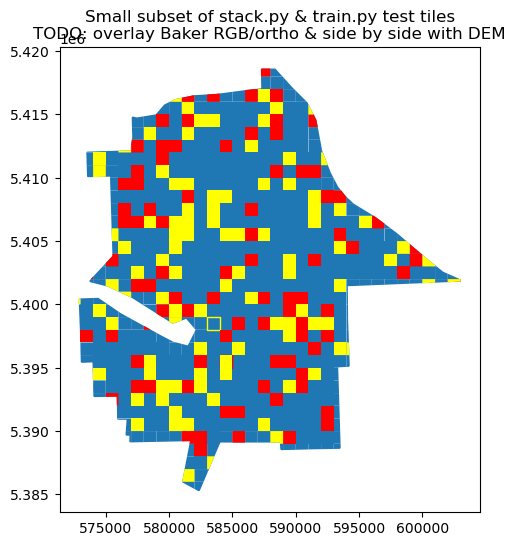

In [21]:
gdf = gpd.read_file("Mt_Baker_LiDAR_Tile_Index.shp")
fig, ax= plt.subplots(figsize=(5,8))
gdf.plot(ax=ax)
train_tile_ids = ["10UEU8495"]
val_tile_ids = ["10UEU8398"]
gdf[gdf["Tile"].isin(train_tile_ids)].plot(ax=ax, color="none", edgecolor="red")
gdf[gdf["Tile"].isin(val_tile_ids)].plot(ax=ax, color="none", edgecolor="yellow")

plt.title("Small subset of stack.py & train.py test tiles\nTODO: overlay Baker RGB/ortho & side by side with DEM")
plt.tight_layout()
# Have to separate into train/test before this plotting
gdf.sample(100).plot(ax=ax,color="red") # legend_kwds={"labels":["train"]}) # legend?
gdf.sample(100).plot(ax=ax,color="yellow")
# plt.title("Potential Train/val/test split of Baker tiles")

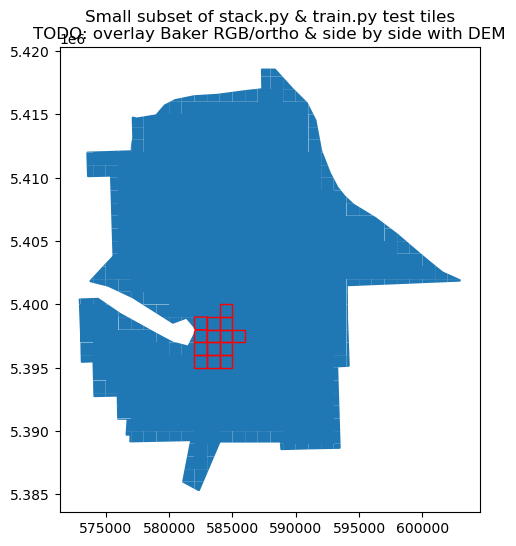

In [32]:
gdf = gpd.read_file("Mt_Baker_LiDAR_Tile_Index.shp")
fig, ax= plt.subplots(figsize=(5,8))
gdf.plot(ax=ax)
gdf[gdf["Tile"].isin(subset_tile_ids)].plot(ax=ax, color="none", edgecolor="red")
plt.title("Small subset of stack.py & train.py test tiles\nTODO: overlay Baker RGB/ortho & side by side with DEM")
plt.tight_layout()
# Have to separate into train/test before this plotting
# gdf.sample(100).plot(ax=ax,color="red") # legend_kwds={"labels":["train"]}) # legend?
# gdf.sample(100).plot(ax=ax,color="yellow")
# plt.title("Potential Train/val/test split of Baker tiles")